## Partial differential equations
***
**PARIS SACLAY UNIVRSITY**  
**Author** : ELKADDOURI MEHDI
***
### Summary
Within the framework of this project, we will use the explicit and implicit numerical methods to solve ***the Black and scholes PDE.***

***The vasicek model*** was solved using theta scheme and crank-nicolson.

***Cox, Ingersoll and Ross*** was done using crank-nicolson.


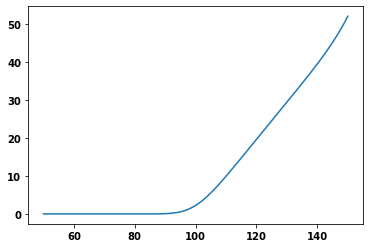

In [1]:
from IPython.display import IFrame
from BS_EDP import my_bs_edp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image


## BLACK AND SCHOLES

The PDE to solve to price an European option is:
\begin{align*}
\frac{\partial C}{\partial t} + r S \frac{\partial C}{\partial S} + \frac{\sigma^2 S^2}{2}\frac{\partial^2 C}{\partial S^2} - rC = 0, \\
\end{align*}
***
### Explicit method

$$\frac{C^{n+1}_{i} - C^{n}_{i}}{\Delta t} + r S_i \frac{C^{n+1}_{i+1} - C^{n+1}_{i-1}}{2\Delta S} + \frac{\sigma^2 S_i^2}{2}\frac{C^{n+1}_{i+1} - 2C^{n+1}_i + C^{n+1}_{i-1}}{(\Delta S)^2} - rC^{n+1}_i = 0$$

In [32]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Implicit_method-stencil.svg/220px-Implicit_method-stencil.svg.png'
IFrame(url, width=300, height=150)


***Let's use the data given in the project***

In [3]:
Sigma = 0.2
Smin = 50
Smax = 150
K = 100
tau = 0.25
r = 0.08
b = -0.04
Nx = 100 
Nt = 1000

In [4]:
prices= my_bs_edp()

prices = prices.explicit_euler(Sigma, Smin, Smax, K, r, tau,b, Nx, Nt)

Stability condition: 0.036000000000000004  < 1/2 ? 	 True


the explicit scheme is stable under the following condition:  
$ \frac{ \partial t} {\partial S^2 * (\sigma * Smax)^2 } < 1/2$  

as we can see, the condition is well verified

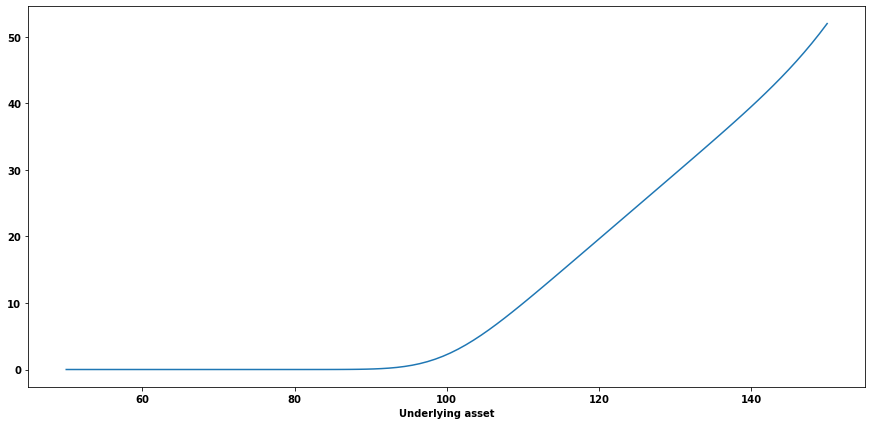

In [5]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
ax.plot(np.linspace(Smin, Smax, Nx), prices[0])
ax.set_xlabel('Underlying asset')
ax.set_label('Pay-off')
plt.show()

***As the value of the underlying asset is above the strike K we can see that the call is a linear increasing function***   
***As we can see in the plot, this is the graph of the call option at maturity which means that our explicit method is working very well***

***
### Implicit method

In [6]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Explicit_method-stencil.svg/220px-Explicit_method-stencil.svg.png'
IFrame(url, width=300, height=150)

$$\frac{C^{n+1}_{i} - C^{n}_{i}}{\Delta t} + r S_i \frac{C^{n}_{i+1} - C^{n}_{i-1}}{2\Delta S} + \frac{\sigma^2 S_i^2}{2}\frac{C^{n}_{i+1} - 2P^{n}_i + C^{n}_{i-1}}{(\Delta S)^2} - rC^{n}_i = 0$$


In [7]:
Sigma = 0.2
Smin = 50
Smax = 150
K = 100
tau = 0.25
r = 0.08
b = -0.04
Nx = 100 
Nt = 1000

In [8]:
prices= my_bs_edp()

prices = prices.implicite_euler(Sigma, Smin, Smax, K, r, tau,b, Nx, Nt)

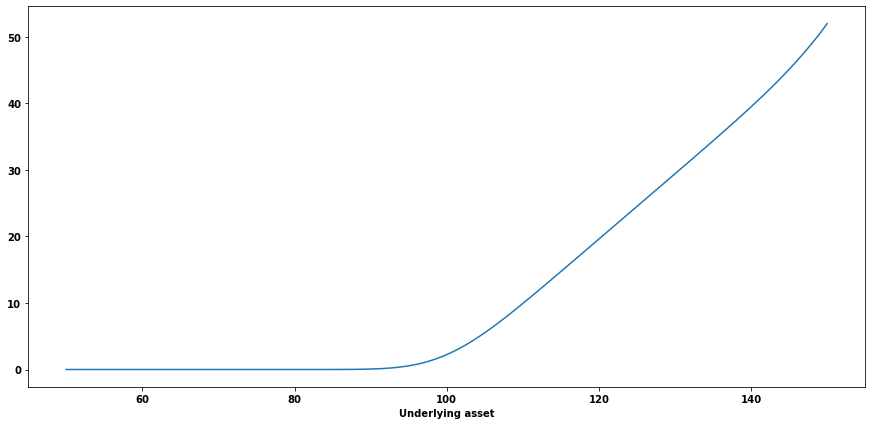

In [9]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
ax.plot(np.linspace(Smin, Smax, Nx), prices[0])
ax.set_xlabel('Underlying asset')
ax.set_label('Pay-off')
plt.show()

***As the value of the underlying asset is above the strike K we can see that the call is a linear increasing function***   
***As we can see in the plot, this is the graph of the call option at maturity which means that our explicit method is working very well***

## VASICEK
in this part, i'll first implement VASICEK using crank nicolson and theta scheme

In the one-factor Vasicek model, the short-rate is modeled as a single stochastic factor:
\begin{equation}
d r(t)=K(\theta-r(t)) d t+\sigma d W(t)
\end{equation}
Here, K, θ, and σ are constants, and σ is the instantaneous standard deviation. W(t) is the
random Wiener process. The Vasicek follows an Ornstein-Uhlenbeck process, where the
model reverts around the mean, θ, with K, the speed of mean reversion. As a result, the
interest rates may become negative, which is an undesirable property in most normal
economic conditions.
***
\begin{equation}
\left\{\begin{array}{l}
\frac{\partial F^{T}}{\partial t}+\{\theta-a(t) r(t)\} \frac{\partial F^{T}}{\partial r}+\frac{1}{2} \sigma^{2} \frac{\partial^{2} F^{T}}{\partial r^{2}}-r(t) F^{T}=0 \\
F(r, T, T)=1
\end{array}\right.
\end{equation}
We see that $ \mu(t; r) - \lambda(t; r)\sigma(t) = \theta- a(t)r(t) $  
with $ \theta = a*b-\lambda  \sigma $  
and so, the drift includes the market price of risk and the volatility that should be calibrated against real data. The analytical solution for the short rates in this model is as follows. 
***
In this dissertation we will show the procedure to price Zero-Coupon bonds solving
the Hull-White PDE through the Finite Dierence Method, in particular,
Crank-Nicolson

To solve the PDE above through Crank-Nicolson we then need to dene a grid with the rates as rows and time as columns. The idea behind this grid
is to discretise these two variables in N pieces of h length equal to dr and T pieces of k length equal to dt. Therefore, applying the central and second central
differences to both variables we get

\begin{equation}
\begin{aligned}
u_{i j} &=u\left(r_{i}, t_{j}\right) \\
\frac{\partial u\left(r_{i}, t_{j}\right)}{\partial t} &=\frac{u_{i j+1}-u_{i j-1}}{2 k} \\
\frac{\partial u\left(r_{i}, t_{j}\right)}{\partial r} &=\frac{u_{i+1 j}-u_{i-1 j}}{2 h}
\end{aligned}
\end{equation}

\begin{equation}
\frac{\partial^{2} u\left(r_{i}, t_{j}\right)}{\partial r^{2}}=\frac{u_{i+1 j}+u_{i-1 j}-2 u_{i j}}{h^{2}}
\end{equation}

Now, applying these Crank-Nicolson equalities to the Vasicek term-structure equation:
$$
\frac{\partial u_{i j}}{\partial t}=r_{i} u_{i j}-\{\theta-a(t) r(t)\} \frac{u_{i+1 j}-u_{i-1 j}}{2 h}-\frac{1}{2} \sigma^{2} \frac{u_{i+1 j}+u_{i-1 j}-2 u_{i j}}{h^{2}}
$$
that can be realigned to give the multipliers of each $u_{i}$
$$
\frac{\partial u_{i j}}{\partial t}=\left(-\frac{\sigma^{2}}{2 h^{2}}+\frac{\{\theta-a(t) r(t)\}}{2 h}\right) u_{i-1 j}+\left(\frac{\sigma^{2}}{h^{2}}+r_{i}\right) u_{i j}-\left(\frac{\sigma^{2}}{2 h^{2}}+\frac{\{\theta-a(t) r(t)\}}{2 h}\right) u_{i+1 j}
$$
Thus, letting:
$$
\begin{array}{c}
P_{d}=-\frac{\sigma^{2}}{2 h^{2}}+\frac{\{\theta-a(t) r(t)\}}{2 h} \\
P_{m}=\frac{\sigma^{2}}{h^{2}}+r_{i} \\
P_{u}=-\frac{\sigma^{2}}{2 h^{2}}-\frac{\{\theta-a(t) r(t)\}}{2 h}
\end{array}
$$

we can perform the following matrix where $t_{j}=j k ; j=0,1,2, \ldots, T$ and $r_{i}=$ $i h ; i=0,1,2, \ldots, N$
$$
A=\left(\begin{array}{ccccccc}
P_{m}\left(r_{0}, t_{j}\right) & P_{u}\left(r_{0}, t_{j}\right) & 0 & 0 & 0 & \ldots & 0 \\
P_{d}\left(r_{1}, t_{j}\right) & P_{m}\left(r_{1}, t_{j}\right) & P_{u}\left(r_{1}, t_{j}\right) & 0 & 0 & \ldots & \vdots \\
0 & P_{d}\left(r_{2}, t_{j}\right) & P_{m}\left(r_{2}, t_{j}\right) & P_{u}\left(r_{2}, t_{j}\right) & 0 & \ldots & : \\
0 & 0 & P_{d}\left(r_{3}, t_{j}\right) & P_{m}\left(r_{3}, t_{j}\right) & P_{u}\left(r_{3}, t_{j}\right) & \ldots & : \\
: & : & : & \vdots & : & : & : \\
0 & 0 & 0 & \ldots & 0 & P_{d}\left(r_{N}, t_{j}\right) & P_{m}\left(r_{N}, t_{j}\right)
\end{array}\right)
$$
that will define the behavior of the rates every time-step $k$ passes. Letting a vector $\mathbf{u}$ represent the rates at time $j,$ following Crank-Nicolson, we will have the functions that define increments in rates from $j$ to $j+1$ as:
$$
\frac{\mathbf{u}_{j+1}-\mathbf{u}_{j}}{k}=\frac{\mathbf{A}\left(t_{j}\right) \mathbf{u}_{j}+\mathbf{A}\left(t_{j+1}\right) \mathbf{u}_{j+1}}{2}
$$
that will be solved as:
$$
\mathbf{u}_{j}=\left(\mathbf{I}+\frac{k}{2} \mathbf{A}\left(t_{j}\right)\right)^{-1}\left(\mathbf{I}-\frac{k}{2} \mathbf{A}\left(t_{j+1}\right)\right) u_{j+1}
$$
Reprocessing this calculations starting from maturity backwards for all timesteps and organizing $\bar{u}$ in a matrix we will get the solution for the PDE. Note that in the case of Zero-Coupon bonds we should start with the boundary condition $\bar{u}_{T}=1$ for all $i$ since the value of a Zero-coupon bond at maturity will equal $1 .$

In [10]:
from Vasicek_EDP import my_vasicek

In [11]:
rmin = -1
rmax = 1
a = 0.95
b = 0.10
T=5
Nt=1001
Nx=101
Lambda = 0.05
sigma=0.2
Vasicek= my_vasicek(rmin,rmax,T,Nx,Nt,a,b,sigma,Lambda)

In [12]:
A=Vasicek.create_A_matrix()

In [13]:
B=Vasicek.create_B_matrix()

In [14]:
U=Vasicek.solution_crank(A,B)

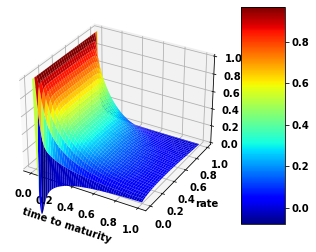

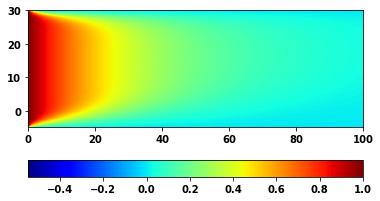

In [15]:
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

***The vasicek model is printed above in 3D***

### Theta scheme
the theta scheme is defined as follows:  
<center> $\theta$ * implicite scheme + (1-$\theta$)explicite_scheme   

***let's use theta scheme to see the variation of theta effect***
    
In order to make sure that our theta scheme is well defined , let's choose $ \theta $ = 1/2 first

In [16]:
A_theta=Vasicek.create_A_theta(1/2)

In [17]:
B_theta=Vasicek.create_B_theta(1/2)

In [18]:
U_theta=Vasicek.solution_crank(A_theta,B_theta)

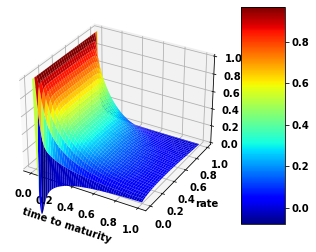

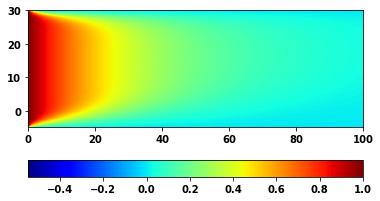

In [19]:
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_theta
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

***The theta scheme discretization is working well , now let's move to other value of theta***
*** 
<font size="4">  $\theta = 0 $ </font>

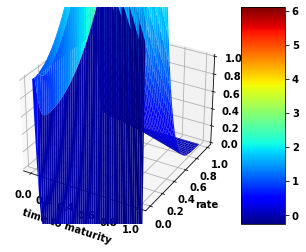

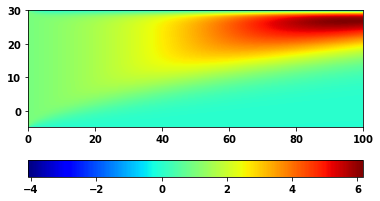

In [20]:
A_theta=Vasicek.create_A_theta(0)
B_theta=Vasicek.create_B_theta(0)
U_theta=Vasicek.solution_crank(A_theta,B_theta)
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_theta
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

<font size="4">  $\theta = 0.25 $ </font>

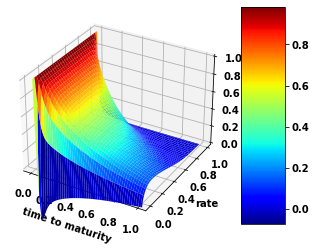

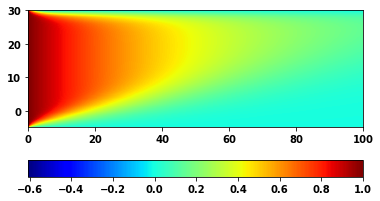

In [21]:
A_theta=Vasicek.create_A_theta(0.25)
B_theta=Vasicek.create_B_theta(0.25)
U_theta=Vasicek.solution_crank(A_theta,B_theta)
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_theta
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

<font size="4">  $\theta = 0.75 $ </font>

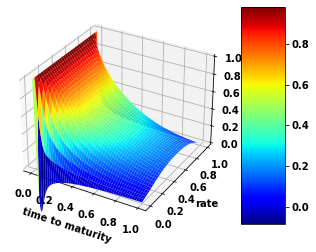

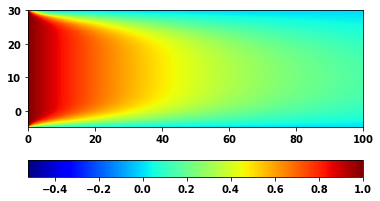

In [22]:
A_theta=Vasicek.create_A_theta(0.75)
B_theta=Vasicek.create_B_theta(0.75)
U_theta=Vasicek.solution_crank(A_theta,B_theta)
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_theta
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

<font size="4">  $\theta = 1 $ </font>

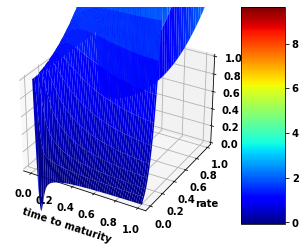

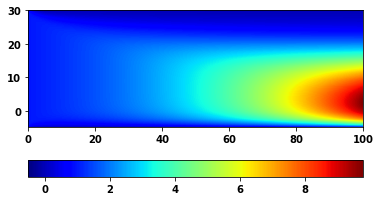

In [23]:
A_theta=Vasicek.create_A_theta(1)
B_theta=Vasicek.create_B_theta(1)
U_theta=Vasicek.solution_crank(A_theta,B_theta)
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_theta
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

***As we have seen in the course , the scheme influence our parameters so we have***

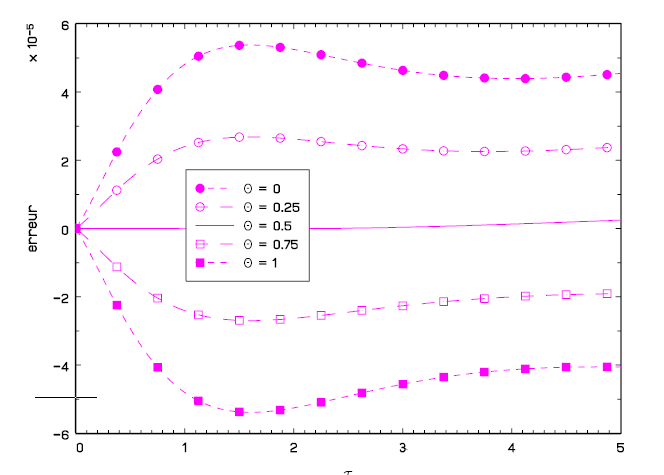

In [24]:
Image(filename='Theta.png')

### Cox, Ingersoll and Ross

The Cox-Ingersoll-Ross (CIR) model is a one-factor model that was proposed to address
the negative interest rates found in the Vasicek model. The process is given as follows:  
\begin{equation}
d r(t)=K(\theta-r(t)) d t+\sigma \sqrt{r(t)} d W(t)
\end{equation}

Knowing that : 
$ \sigma(t,r) = \sigma * \sqrt(r)$  


$ \lambda(t,r) = \lambda *  \sqrt(r) / \sigma $

The model will be simplified. I did

***I did the same resolution as Vasicek considering kappa and the specific parameters of the model***
$$
\begin{array}{c}
P_{d}=-\frac{\sigma^{2} r}{2 h^{2}}+\frac{\{k(\theta- r))- \lambda r}{2 h} \\
P_{m}=\frac{\sigma^{2} r}{h^{2}}+r_{i} \\
P_{u}=-\frac{\sigma^{2} r }{2 h^{2}}-\frac{\{k(\theta- r)- \lambda r}{2 h}
\end{array}
$$

In [25]:
from CIR import my_CIR

In [26]:
kappa = 0.8
theta = 0.10
sigma = 0.5
Lambda = 0.05
T = 5
Nt = 101
rmin = 0
rmax = 1
Nx = 51

In [27]:
CIR= my_CIR(rmin,rmax,T,Nx,Nt,kappa,theta,sigma,Lambda)

In [28]:
A_CIR= CIR.CIR_A_matrix()

In [29]:
B_CIR=CIR.CIR_B_matrix()

In [30]:
U_CIR=CIR.solution_CIR(A_CIR,B_CIR)

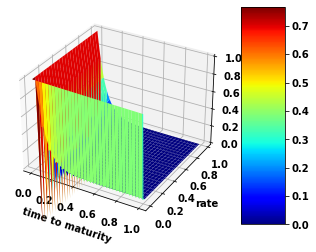

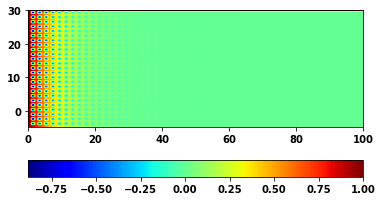

In [31]:
X = np.arange(0, Nt)
Y = np.arange(0, Nx)
X, Y = np.meshgrid(X / Nt, Y / Nx)
Z = U_CIR
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.jet)
ax.set_xlabel('time to maturity')
ax.set_ylabel('rate')
ax.set_zlabel('price')
ax.set_zlim(0, 1)
fig.colorbar(surf, shrink=1, aspect=5)
plt.show()
im = plt.imshow(Z, cmap=cm.jet, extent=[0, 100, -5, 30])
plt.colorbar(im, orientation='horizontal')
plt.show()

***
***I couldn't find the reason why my model isn't  converging but i have adopted the same strategy as Vasicek***

## Conclusion
During this project , we have resolved 3 main equations : 
1. Black and scholes ( implicit and explicit scheme)
2. Vasicek Model (crank nicolson and theta scheme)
3. Cox, Ingersoll and Ross ( crank nicolson)